# Module 10: Introduction to Causal Inference

# Introduction

In previous modules, we have studied correlations and associations between variables. You've probably heard many times that "correlation does not imply causation." However, when we need to understand the effect of smoking on lung cancer or the effect of education on salaries it is not enough just to find the *associations* between variables. We need to understand *why*, and demonstrate that there are causes that influence their effects. We also need to be very careful about which variables affect others and how we are going to control them to get the correct results from an analysis.

This module provides an introduction to causal inference, an emerging methodology for properly allowing for cause and effect when doing regression.

# Learning Outcomes

In this module, you will learn:

* The basics of causal inference
* The important concepts of observations, counterfactuals, and interventions
* How to use causal models and their probabilistic representations

# Reading and Resources

We invite you to further supplement this notebook with the following recommended texts:

- Pearl, J., Mackenzie, D., (2018). *The Book of Why. The New Science of Cause and Effect*. Basic Books.


- Pearl, J., Glymour, M., Jewell, N. P., (2016). *Causal Inference in Statistics: A Primer.* Wiley.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<br>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#Module-10:-Introduction-to-Causal-Inference" data-toc-modified-id="Module-10:-Introduction-to-Causal-Inference">Module 10: Introduction to Causal Inference</a></span>
</li>
<li><span><a href="#Introduction" data-toc-modified-id="Introduction">Introduction</a></span>
</li>
<li><span><a href="#Learning-Outcomes" data-toc-modified-id="Learning-Outcomes">Learning Outcomes</a></span>
</li>
<li><span><a href="#Reading-and-Resources" data-toc-modified-id="Reading-and-Resources">Reading and Resources</a></span>
</li>
<li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents">Table of Contents</a></span>
</li>
<li><span><a href="#Causation-and-Association" data-toc-modified-id="Causation-and-Association">Causation and Association</a></span>
</li>
<li><span><a href="#The-Ladder-of-Causation" data-toc-modified-id="The-Ladder-of-Causation">The Ladder of Causation</a></span>
<ul class="toc-item">
<li><span><a href="#Seeing:-Association" data-toc-modified-id="Seeing:-Association">Seeing: Association</a></span>
</li>
<li><span><a href="#Doing:-Intervention" data-toc-modified-id="Doing:-Intervention">Doing: Intervention</a></span>
</li>
<li><span><a href="#Imagining:-Counterfactuals" data-toc-modified-id="Imagining:-Counterfactuals">Imagining: Counterfactuals</a></span>
</li>
</ul>
</li>
<li><span><a href="#Bayesian-Networks" data-toc-modified-id="Bayesian-Networks">Bayesian Networks</a></span>
</li>
<li><span><a href="#Representing-Uncertainty" data-toc-modified-id="Representing-Uncertainty">Representing Uncertainty</a></span>
</li>
<li><span><a href="#Bayesian-Inference" data-toc-modified-id="Bayesian-Inference">Bayesian Inference</a></span>
</li>
<li><span><a href="#Building-a-Bayesian-Network" data-toc-modified-id="Building-a-Bayesian-Network">Building a Bayesian Network</a></span>
</li>
<li><span><a href="#Randomized-Controlled-Trial" data-toc-modified-id="Randomized-Controlled-Trial">Randomized Controlled Trial</a></span>
<ul class="toc-item">
<li><span><a href="#Paradoxes-that-aren't" data-toc-modified-id="Paradoxes-that-aren't">Paradoxes that aren't</a></span>
</li>
</ul>
</li>
<li><span><a href="#References" data-toc-modified-id="References">References</a></span>
</li>
</ul>
</div>

# Causation and Association

The main focus of statistical analysis is finding associations between variables. 

However, if we consider only associations, without understanding causality, we can fall into traps like these:

- Data shows that as the number of fires increase, so does the number of deployed firefighters. Therefore, to cut down on fires, you should reduce the number of firefighters.


- Data shows that people who hurry tend to be late to their meetings. So, don't hurry or you'll be late.

We ideally would like to look beyond simple association to the underlying cause and effect that ultimately manifested as the association (assuming the association isn't just noise due to sampling error).  This is what distinguishes science from pure mathematics and provides us with insight we can apply more generally.  We want to be able to answer questions such as:

- How effective is a given treatment in preventing a disease, properly controlling for all the other factors?
- Did the new tax law cause our sales to increase or was it our advertising campaign?
- What is the healthcare cost attributable to obesity?
- Can hiring records prove an employer is guilty of discrimination?

Fortunately the notion of causality has recently undergone a major transformation from a concept shrouded in mystery into a mathematical object with well-defined semantics and well-founded logic. 

# The Ladder of Causation

According to Judea Pearl, a professor at UCLA and the foremost thinker about causation, there are three levels of cognitive ability: seeing, doing, and imagining.

1. **Seeing** (or observing) entails detection of regularities in our environment.<br><br>

2. **Doing** involves predicting the effect(s) of deliberate alterations of the environment and choosing among these alterations to produce a desired outcome.<br><br>

3. **Imagining** is what prepared us for our revolutions in agriculture and science and led to a sudden and drastic change in our species' impact on the planet.

Pearl suggests we think of these levels as a three-runged ladder:


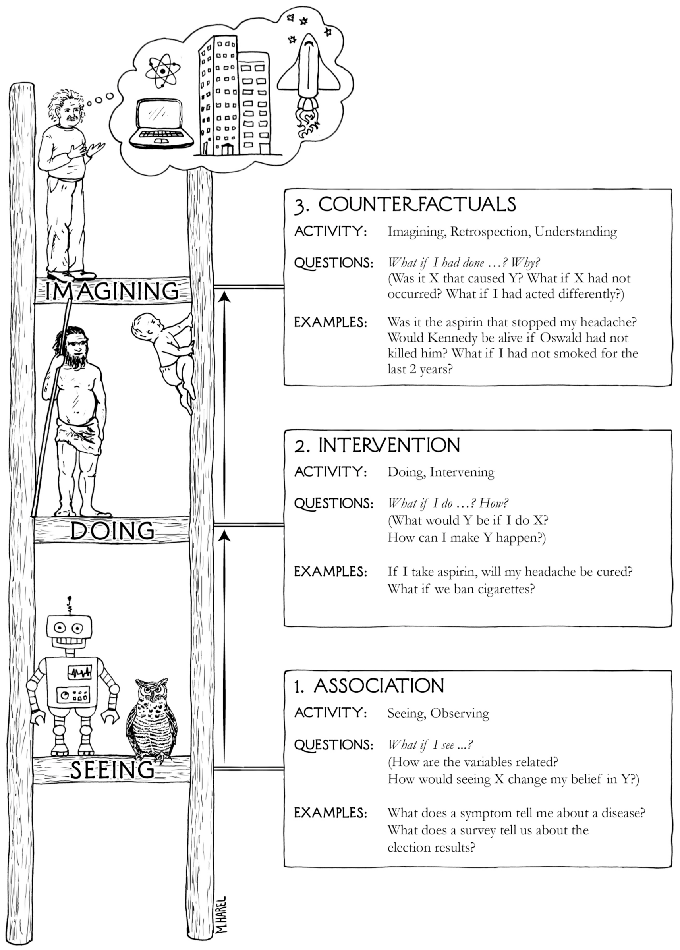

<center><b>Source</b>: Pearl, J., Mackenzie, D. (2018).</center><br>

<center><b>The Ladder of Causation: </b><i>The image above shows a ladder with 3 levels: Seeing, Doing, and Imagining. <br><br>The lowest level is Seeing and has a box next to it which reads: "1. Association. ACTIVITY: Seeing, Observing. QUESTIONS: What if I see...? How are the variables related? How would seeing X change my belief in Y? EXAMPLES: What does a symptom tell me about a disease? What does a survey tell us about the election results?".<br><br> The second level is Doing and the box next to it reads: "2. INTERVENTION. ACTIVITY: Doing, Intervening. QUESTIONS: What if I do...? How? What would Y be if I do X? How can I make Y happen? EXAMPLES: If I take an aspirin, will my headache be cured? What if we ban cigarettes?". <br><br>The final level is Imagining and the box next to it reads: "3. COUNTERFACTUALS. ACTIVITY: Imagining, Retrospection, Understanding. QUESTIONS: What if had done...? Why? Was it X that caused Y? What if X has not occurred? What if I had acted differently? EXAMPLES: Was it the aspirin that stopped my headache? Would Kennedy by alive if Oswald had not killed him? What if I had not smoked for the last 2 years?"</i></center>



## Seeing: Association

At the first level, we are looking for patterns in observations. We find that one event is associated with another if observing one changes the likelihood of observing the other. We are at this level if our predictions about the world are based only on passive observations. 

For example, if we want to know how likely a customer who bought toothpaste is to also buy dental floss, we would collect customer shopping data. Next, we would select only those who bought toothpaste, and focusing on this group, compute the proportion who bought dental floss. This proportion is a conditional probability, $P(\text{floss}\ |\ \text{toothpaste})$, that measures the degree of association between "buying toothpaste" and "buying floss." We may also say that there is a correlation, and go on to perform regression analysis to measure the strength of the relationship. Here, the association between events is uncovered, but *we cannot tell which is the cause and which is the effect*. This is why Karl Pearson taught the world to repeat "correlation does not imply causation."

In some situations, a good prediction is enough and the causal relationship may not really matter. We may be able to build a perfectly good predictive model using standard machine learning algorithms. These algorithms, including deep learning, operate almost entirely on detected associations. They attempt to fit data to a function and are driven by a stream of observations. Deep neural networks allow us to use very complex fitting functions, and as a result the successes of deep learning have been truly remarkable. Nevertheless, they don't give a computer the intelligence to discover causal relationships: raw data still drives the fitting process.

## Doing: Intervention

When we reach the second level, we can start to ask questions like "What will happen to our floss sales if we double the price of toothpaste?". We can only answer these kinds of cause and effect questions if we can perform an intervention. Observation is not enough. We need to be able to actively change an input such as the price and see how the output (floss sales) changes as a result.

Questions about interventions cannot be answered just with passively collected data, no matter how big the data set or how deep the neural network. In our example, we could go to the database and select observations where the cost of toothpaste was twice as much as the average. But, the price may have been higher for other reasons (like dental products were generally in short supply) which might also affect floss sales. What we need is to know the effect of an intervention that would set a new price &mdash; regardless of market conditions. The result might be quite different from those when the customer just couldn't find a better deal. Having data on the market conditions that existed on the previous occasions potentially may lead to better predictions, but it is not clear exactly what data we need.

A very direct way to determine the result of an intervention is to experiment with it under controlled conditions. Big data companies routinely perform such experiments. What we want is to use what we learn from the intervention to build a better model that will allow us to make successful predictions of what would result from other interventions without actually having to do the experiment. We could, for example, develop a model of consumer behaviour that includes the effects of market conditions.

The defining query at the second level is "What if we do...?" or what will happen if we change the environment? This kind of query can be written as $P(\text{floss}\ |\ \text{do(toothpaste)})$, which asks about the probability to sell floss given that we set the price of toothpaste at another price. Here, **do** means do an intervention on the variable in the brackets.

We do interventions in our daily life. For example, when we take aspirin for a headache we intervene on one variable (the quantity of aspirin in our body) in order to affect another variable (headache status). If the headache is gone we might wonder: "Was it the aspirin I took or something else: the food I ate, the nap I took, the good news I heard?" We can't answer these kinds of questions without moving up to the third rung of the ladder.

## Imagining: Counterfactuals

These queries take us to the top of the Ladder of Causation, the level of **counterfactuals**. To answer these kinds of questions we need to ask "What would have happened if I had not taken the aspirin?" The third level is very difficult, because no experiment can deny treatment of an already treated person and compare the two outcomes. This is the fundamental problem of causal inference: it is impossible to observe the effect of more than one alternative treatment on a subject during a fixed time window. Unfortunately, this means directly observing causal effects is impossible.

Data are facts but they cannot tell us what will happen in a counterfactual world where some observed facts are negated. In our toothpaste example, the third level question would be "What is the probability that a customer who bought the toothpaste would still have bought it had we doubled the price?" Here the real world can only be compared to an imaginary world. 

Causal models, which add information beyond the raw data about cause and effect based on our knowledge of the way the world works help us answer these interventional and counterfactual questions. Models that can answer these questions have immense value. They can help us design business strategies, preventive measures to avoid sickness, and find treatments to cure diseases when they occur. To do this we need to develop theories of the underlying mechanism &mdash; i.e. we transition from math and raw data to science.

# Bayesian Networks

Associations between variables can be depicted in the form of a graph called a **Bayesian network**, where the nodes are variables and the arcs representing the associations are undirected. If we know the causal relationships between the variables, we can draw a more powerful kind of Bayesian network, a **causal diagram**, where each node is connected by an arrow to one or more nodes over which it has a causal influence.

Here's an example: Suppose that a prisoner is about to be executed by a firing squad. Here is the chain of events:

- The court orders (CO) the execution
- The order goes to a captain (C), who signals the soldiers (A and B) on the firing squad to fire
- If either one of them shoots, the prisoner dies (D)

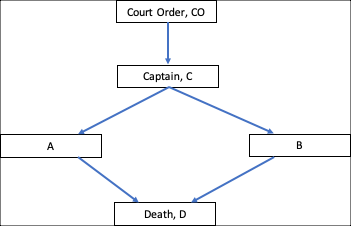


The diagram shown above represents this story. Each of the variables (CO, C, A, B, D) in this example can take either a *true* or *false* value. 

What kinds of questions might we ask?

- **Associations**: With this graph diagram we can answer an association query. If the prisoner is dead, we may conclude from inspecting the graph that the two soldiers (A and B) would not have fired without the captain's command. (We're assuming everyone here always follows orders and does not act without them). Likewise, tracing the rules, we find that the captain would not have given the command if he did not have an order from the court. We have an association of event *Death = True* with *Captain = True*, and *Death = True* and *Court Order = True*. Also, if we find that A fired it would mean that B must have fired too. Soldier A would not have fired if the captain hadn't signaled, so B must have fired as well. This is true even though A does not *cause* B. 


- **Interventions**: We may ask, "What if soldier A decided on his own to fire, without waiting for the captain's command?". This would be an intervention: we force *A = True*. This would break the rules, so to answer this query we need to teach the computer *how* to break the rules &mdash; i.e. the difference between merely observing an event and making it happen. Here's what we'll do. When we make *A = True* we remove all arrows that point to that event and continue the analysis as if the arrows had never been there. This intervention leads inevitably to the prisoner's death. That is the *causal* function represented by the arrow leading from _A_ directly to _D_. Also, we would conclude that B did not shoot (assuming he's still following the rules) &mdash; nothing about A's decision should affect variables in the model that are not effects of A's shot. To summarize:<br><br>
  - If we __see__ A shoot, then we conclude that B shot too.<br><br>
  - However, if A __decides__ to shoot, or if we force A to shoot, then B did not shoot.
     
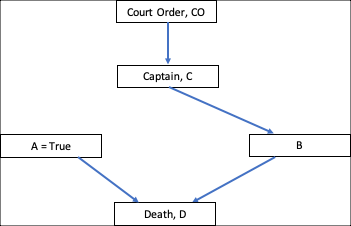

- **Counterfactual**: Suppose the prisoner is dead, *D = True*. From this we conclude that A fired, B fired, the captain gave the signal, and the court gave the order. What if A had decided not to shoot? Would the prisoner still be alive? This question requires us to compare the real world with a fictitious world where A did not shoot. Here, we erase the arrow from C to A to liberate A from its dependence on C, and set A to False. We conclude that the prisoner would still be dead, because all other variables are set to true and B's shot would have killed him.

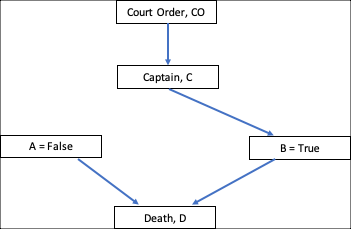

These are toy questions with obvious answers. There are many problems where humans might have a much harder time reaching the correct causal conclusions. We might have many more variables and they might not be simple binary (true/false) outcomes. We need a set of methods to help us tackle a variety of problems where the causal relationships may not be at all intuitive and that would allow us to computerize as much of the reasoning as feasible so we can build smart AI systems.

# Representing Uncertainty

In the example above, we didn't have any uncertainties to deal with. Everyone either *did* or *did not* act. In real life, almost all events have some degree of uncertainty, so it's natural to think in terms of the *likelihood of events*.

The probabilistic formalization of causal relationships was recognized long ago. Causation was defined in terms of probability by using the notion of "probability rising":


<center>$X$ causes $Y$ if $X$ raises the probability of $Y$</center>

For example, statements such as "Reckless driving causes accidents" or "You will fail this course because of your laziness" make the consequences more likely, not absolutely certain as the sentences suggest. "$X$ raises the probability of $Y$" can be expressed using conditional probabilities $P(Y\ |\ X) > P(Y)$. However, this expression just captures an observation: if $X$ is an event and I see it occur, then the probability of event $Y$ increases.

But this definition has a flaw. The probability increase may be for other reasons:

* Perhaps $Y$ actually causes $X$
* It could be that some other variable $Z$ causes both $X$ and $Y$

The challenge of determining whether a *common cause* such as $Z$, called a **confounder**, is responsible can be a difficult one.

The proper way to define the probability-rising idea is with our do-operator which means we intervene to force the value of $X$ irrespective of other influences such as $Y$ or $Z$. Here's the *corrected*, modern definition:<br><br>


<center>$X$ causes $Y$ if $P(Y\ |\ \text{do(X)}) > P(Y)$</center>


# Bayesian Inference

Bayesian networks provide a way to incorporate probabilities into decisions by assigning probabilities to the possible outcomes at each of the nodes. We can then use the network and the actual outcomes we observe for some of the nodes to swiftly compute the likelihood that other nodes will be seen to have specific outcomes. This is what we call **Bayesian inference**.

Most of the tools of statistics were designed to be strictly objective. By objective, we mean that two people would have to  agree that a particular statistic has the same value, regardless of their personal opinions. For example, everyone would agree that the mean of 2 and 4 is 3. The methods of Bayesian statistics are an important exception to this rule. Because of this (and the significant amount of computation the  methods sometimes require), the Bayesian approach has taken almost two centuries to be embraced by statisticians. It has, however, achieved growing popularity over the last few decades and has now gone mainstream.

The key idea of the Bayesian approach is that probability can be viewed as a kind of *strength of belief* in some statement purported to be a fact, and as we are exposed to new relevant evidence, we update this strength of belief, either increasing or reducing it based on what the new evidence is telling us:<br><br>

<center>Prior Belief + New Evidence $\rightarrow$ Revised Belief</center>

Bayes's rule can be thought of as a distillation of the scientific method:

1. Formulate a hypothesis.<br><br>

2. Deduce a testable consequence of the hypothesis.<br><br>

3. Perform an experiment and collect evidence.<br><br>

4. Update your belief in the hypothesis.

Here's an example. Suppose someone hands you an ordinary looking coin. You would probably, based on your prior life experience, expect the coin to be very close to fair. Let's say you toss it ten times and find that in nine of those tosses the coin came up heads. This would no doubt shake that initial belief. 

According to traditional or *frequentist* statistics, you would *have to* say that in the absence of any other additional evidence, the coin *is* loaded and the probability to get heads on the next toss $P(heads)$ is 9/10. But this somehow doesn't seem reasonable *given our common knowledge about coins and physics*.

A Bayesian statistician would take into account your prior knowledge about the coin. Did it come from the neighborhood grocery or a shady gambler? If it is an ordinary coin, our *prior belief* would be $P(heads) = 1/2$, and we would not change our belief nearly as dramatically as the frequentist would demand.

Bayesian statistics give us an objective way of combining the observed evidence with our prior knowledge to obtain a revised belief and hence a revised prediction of the outcome of the next toss. Critically, the way of combining the evidence is still objective &mdash; even if the actual strength of belief we have may not be objective (in the sense that it may vary from person to person based on their personal experience, and so Bayesian methods are *subjective* only in that specific way).

What we are actually doing here is a kind of *inverse probability*: we're reasoning from evidence (our observation of 9 out of 10 heads) back to the probability of the cause (of the coin producing heads), not from the probability of a cause to a probability of a predicted resulting outcome. This is a non-trivial task. Having known the cause, it is easy to estimate the probability of the effect, which is the *forward probability*. Going the other direction, from effect to cause, is harder.

In Thomas Bayes' original paper on inverse probability he asked a key question: How much evidence should it take to convince us that something we consider improbable has actually happened? His inverse probability calculation specifies the way to do this. 

The following wonderful example is given in Bayes' paper. Imagine that we shoot a billiard ball on a table. It bounces many times, so many we can't predict where it will stop. When it does stop, what is the probability that it will stop within $x$ feet of the left-hand end of the table?

If the length of the table is known, this is very simple question: for the length $L$ it would be $\frac{x}{L}$. On a twelve-foot snooker table, the probability of the ball stopping within a foot of the end would be 1/12, on an eight-foot, 1/8. The longer the table length ($L$) the lower the probability $\frac{x}{L}$, because there are more positions for the ball's resting place.

Now, let's consider the inverse-probability problem. We observe the final position of the ball to be $x = 1$ foot from the end, but we aren't told the length $L$ of the table. What is the probability the length was, say, 100 feet? This is much harder question. Here the length $L$ is the cause and $x$ is the effect. How did Bayes solve it? We'll come back to this.

**Example: Teahouse Orders**

But first, let's look at a simpler example, one of customers of a teahouse and their ordering preferences.

|Customer|Tea|Scones|Customer|Tea|Scones|
|---:|:---:|---:|---:|---:|---:|
|1|Yes|Yes|7|Yes|No|
|2|No|Yes|8|Yes|Yes|
|3|No|No|9|Yes|No|
|4|No|No|10|Yes|No|
|5|Yes|Yes|11|No|No|
|6|Yes|No|12|Yes|Yes|

As the data table above shows, two thirds of the customers (numbers 1, 5, 6, 7, 8, 9, 10 and 12) order tea, and half of the tea drinkers also order scones (1, 5, 8, 12). From this, one third of the customers order both tea and scones, because half of two thirds is one third. The proportion of customers who ordered both tea and scones is $(1/2) \cdot (2/3) = 1/3$.

We could have analyzed the data in the reverse order: observe that five twelfths of the customers (1, 2, 5, 8, 12) ordered scones, and four fifths of these (1, 5, 8, 12) ordered tea. So the proportion of customers who ordered both tea and scones is $(4/5) \cdot (5/12)$ or, again, $1/3$.

Now, let $P(T)$ denote the probability that a customer orders tea and $P(S)$ denote the probability they order scones. If we already know a customer has ordered tea, then $P(S|T)$ denotes the probability that the tea drinker orders scones. Likewise, $P(T|S)$ denotes the probability that they order tea given that we know they ordered scones. When we did our first calculation of $P(S \:and\: T)$ above, what we did was:


$$P(S \:and\: T) = P(S|T)P(T)$$


Likewise, the second way we did it was:


$$P(S \:and\: T) = P(T|S)P(S)$$


If the left hand sides are the same, the right hand sides must equal each other. This gives us the famous Bayes' rule:


$$P(T|S)P(S) = P(S|T)P(T)$$


which offers a general solution to the inverse-probability problem. If we know the probability of $S$ given $T$, $P(S|T)$, we ought to be able to figure out the probability of $T$ given $S$, $P(T|S)$, assuming $P(T)$ and $P(S)$ are known.

To apply Bayes' rule to the teahouse example, we may happen to know that:

* Half of those who order tea also order scones, $P(S|T)=1/2$
* Two thirds of customers order tea, $P(T)= 2/3$
* Five twelfths of customers order scones, $P(S) = 5/12$

Using Bayes' rule we can answer what proportion of scone eaters order tea: $P(T|S) * (5/12) = (1/2) * (2/3)$, so the answer is $P(T|S)=4/5$.

This calculation is the same as ratio of the number of customers who ordered scones and tea (1, 5, 8, 12) to the total number of customers who ordered scones (1, 2, 5, 8, 12):


$$P(T|S) = \frac{number\: of\: T\: and\: S}{number\: of\: S}= \frac{T\: and\: S}{T\: and\: S\: +\: No\:T\: and\: S}$$


In the billiards example, in order to get $P(L | x)$ we need the prior probability of the length $L$, which is as tough to come up with as the estimate of $P(L| x)$. This probability will vary significantly from person to person depending on a given individual's previous experience &mdash; a person who has seen many billiards tables will have a different prior than a person who has never seen one. To handle the subjectivity of $P(L)$, Bayes assumed that $L$ is determined mechanically by asking a friend to shoot many additional balls and report how many ended up left and right of the first one. This way the problem is transformed into one where prior probabilities are estimable from data, like in the teahouse example.


**Example: The ELISA test for HIV**

One of the first tests for HIV was ELISA. That test was 97.7% accurate, which means that it would give a positive result for a sick patient with probability 97.7%. The test was quite specific too: for a healthy patient with no HIV it would give a negative result with 92.6% probability. When this test was used the fraction of the general population with HIV was 0.26%.

Given a positive test result for a randomly selected individual, we want to know how likely is it that they are infected &mdash; that is to find the probability $P(HIV | +)$.

Since we know the test's characteristics $P(+|HIV)$ and $P(-|no HIV)$, and the probability that a randomly selected individual is infected $P(HIV) = 0.0026$, we may use Bayes' formula to find $P(HIV | +)$:


$$P(HIV | +)= \frac{P(+|HIV) \cdot P(HIV)}{P(+)}$$


In the denominator we have the total probability to get a positive test, which might happen for either an infected or healthy individual:


$$P(+) = P(+|HIV) \cdot P(HIV) + P(+|no HIV) \cdot P(no HIV)$$


The $P(+|no HIV) = 1 - P(-|no HIV)$ as the probabilities of all possible events for a given condition must sum to one (by the definition of probability, and here there only two alternatives).

Finally, we get:


$$P(HIV | +)= \frac{P(+|HIV) \cdot P(HIV)}{ P(+|HIV) \cdot P(HIV) + (1 - P(-|no HIV)) \cdot P(no HIV)}$$


Plugging in the numbers, we can find:


$$P(HIV|+) = \frac{0.977 \cdot 0.0026}{0.977 \cdot 0.0026 + 0.074 \cdot 0.9974} = 0.033$$


The answer is 3.3%. This is a surprisingly small number despite the test's excellent reliability numbers. This is due to the rareness of the disease and leads to a high number of false positives in the denominator $P(+|no HIV) \cdot P(no HIV)$. Quite often, it doesn't make much sense to test the general population &mdash; the test is primarily administered to patients with symptoms. This subsetting produces a higher probability $P(disease)$ among selected patients.

# Building a Bayesian Network

We've already seen a little about how to build a Bayesian network. It might seem like a good idea if we're analyzing a situation to simply make every variable we know about into a node and make no assumptions about cause and effect, which would lead us to draw an arrow from every node to every other node. Unfortunately this simply says *everything depends on everything else* and won't allow us to come to any conclusions. We need to use our knowledge of cause and effect to draw a diagram that maps out the influences, which then allows us to calculate conditional probabilities for some of the variables given observations of others. Each arc in the graph adds a lot of computational complexity, so we want a minimal graph that doesn't connect nodes that we know can't affect each other.

Bayesian networks are hierarchical i.e. acyclic. Adopting the usual language of hierarchies, the arrows point from causing "parent nodes" to resulting "child nodes." Each node can be thought of as sending a message to all of its neighbours (both parents and children) about the probabilities of the variable it tracks taking each of their possible values. Recipients process the message in two different ways, depending on whether the receiver is a child or a parent. If a message goes from parent to child, the child updates its beliefs using conditional probabilities. If the message goes from child to parent, the parent updates its beliefs by multiplying them by a likelihood ratio.

Bayes's rule for inverse probability corresponds to the simplest Bayesian network. We have seen this network in the examples above: 

* Tea $\rightarrow$ Scone, there is a belief that a customer would order Tea $P(T)$; when it's true, the probability of them ordering a Scone is $P(S|T) \cdot P(T)$; in the reverse direction, if the Scone was ordered, $P(T|S) = P(S|T) \cdot P(T) / P(S)$


* Disease $\rightarrow$ Test


* More generally, Hypothesis $\rightarrow$ Evidence

The arrow merely signifies that we know the "forward" probability, $P(scones|tea)$ or $P(test|disease)$. Bayes' rule tells us how to reverse the procedure, specifically by multiplying the prior probability $P(T)$ by a likelihood ratio, in this case $P(S|T) / P(S)$.

Things get more interesting when we consider more complex networks. Let's discuss a three-node network with two links. You can think of these as fundamental building blocks that any Bayesian network can be built out of. There are three basic types of junctions, that can characterize any pattern of arrows in the network.

1. **A $\rightarrow$ B $\rightarrow$ C**: This junction is the simplest example of a chain or of *meditation*. One often may think of B as the mechanism or mediator that transmits the effect of A to C. For example, for a smoke alarm: _Fire $\rightarrow$ Smoke $\rightarrow$ Alarm_. Here, B screens off some information about A from C, and vice versa. Suppose we have a dataset with all instances where there was a fire or smoke or the alarm went off. If we looked at only rows where Smoke = true, we would expect Alarm = true every time, regardless of whether Fire = false or true. The process of looking only at rows in the table where Smoke = true is the same thing as conditioning on a variable. We may say that Fire and Alarm are conditionally independent, given the value of Smoke, because if we're only looking at rows where Smoke is true, Alarm's value is no longer correlated with Fire's. It's the same if we only look at rows where Smoke is false. Alarm will be false regardless of whether there's a fire or not. Note that Alarm and Fire are only independent when Smoke is known. Otherwise, we sure hope they're correlated!<br><br>

2. **A $\leftarrow$ B $\rightarrow$ C**: This kind of junction is called a *fork*, and B as we've seen is called a common cause or confounder of A and C. A confounder will make A and C statistically correlated even though there is no direct causal link between them. Good examples are _Shoe Size $\leftarrow$ Age of Child $\rightarrow$ Reading Ability_ and _Sunscreen Use $\leftarrow$ Exposure to Sun $\rightarrow$ Skin Cancer_. Children with larger shoes (because they're older) tend to read better, but the relationship is not causal. Giving a child larger shoes would not improve their reading skills. It is easy to see that confounders are responsible for many spurious correlations detected in practice. If we condition on B, variables A and C become conditionally independent. If we know the child's age, the shoe size tells us nothing about their reading ability and vice versa.<br><br>

3. **A $\rightarrow$ B $\leftarrow$ C**: This junction is called a *collider*. An entertaining example of this junction is that of three features of Hollywood actors: _Talent $\rightarrow$ Celebrity $\leftarrow$ Beauty_. This pattern works in the opposite way from chains or forks where we condition on the variable in the middle. If A and C are independent, conditioning on B will make them dependent. Suppose that we look at famous actors (Celebrity = true). We will see a negative correlation between the other two variables: talent and beauty &mdash; finding out that a celebrity is unattractive increases our belief that he or she must be talented. This negative correlation is called a collider bias or the *explain away* effect. We may suppose that an actor does not need to have both talent and beauty to be a celebrity. Then, if Celebrity H is a particularly good actor, that explains away their success and he or she does not have to be very attractive. On the other hand, if Celebrity K is a really bad actor, then the only way to explain their success is his or her beauty. So, given the outcome Celebrity = true, talent and beauty are negatively correlated, even though they are not related in the general population.

The collider in particular should cause you some uneasiness. Standard statistical practice prior to causal analysis has been to *control for all variables*. If the relationship between some of the variables is a collider, controlling for the middle variable will actually *cause* spurious correlations to appear in the data &mdash; exactly what the researcher was trying to avoid. Causal analysis is revolutionizing statistical practice by correcting a long-standing flaw.

# Randomized Controlled Trial

Isolating the distortions caused by confounding variables has always been a problem in statistics. Randomized controlled trials have always been the gold standard for testing cause and effect and causal analysis explains why they are effective. From a causal perspective, the randomized controlled trial is a tool for uncovering the query $P(L | do(D))$. Its main purpose is to disassociate variables of interest (i.e. $D$ and $L$) from other variables (i.e. some confounder $Z$) that would otherwise affect them both. 

**Example: Smoking and newborns**

In the 1950s and 60s there was a big debate over whether smoking causes cancer. It may sound weird today, but until the mid-1950s there was no evidence that would convince the medical community.

Even after the smoking-cancer causal problem was solved, another related major problem took almost 40 years to solve. This problem is known as the birth-weight paradox: in 1959, a long-term public health study was launched that collected data on more than 15,000 children in the San Francisco Bay Area, which included information on mothers' smoking habits, birth weights, and mortality rates of their babies in the first months of life.

Several studies had already shown that the babies of the smoking mothers weighed less at birth on average, and it was supposed that this would translate to poorer survival rates.

The following chain was suggested:

<center>Smoking $\rightarrow$ Low Birth Weight $\rightarrow$ Mortality</center>

But the study of 15,000 children produced a rather surprising result. It confirmed that the babies of smokers had lower birth weight on average than the babies of nonsmokers. However, the low-birth-weight babies of smoking mothers had a better survival rate than those of nonsmokers. This result led to the conclusion that there is no causal path from Smoking to Mortality.

Further analysis of the problem revealed the we must consider other causes of low birth weight, such as serious genetic abnormalities, which are much more harmful. There are two possible explanations for a low birth weight:

* The baby might have a smoking mother
* It might be affected by one of those other causes

If we find out that the mother is a smoker, this explains the low weight and reduces the likelihood of a serious birth defect. But if the mother does not smoke, we now have stronger evidence that the cause of the low birth weight is a birth defect, and the baby's prognosis as a result becomes worse.

The causal diagram below makes the source of bias apparent. This paradox is an example of **collider bias**, with Birth Weight as a collider. By looking only at low birth weight we are conditioning on this collider. This opens up a path between Smoking and Mortality: Smoking $\rightarrow$ Birth Weight $\leftarrow$ Birth Defect $\rightarrow$ Mortality. This is a non-causal path, and it induces a spurious correlation between Smoking and Mortality, biasing the estimate  of the actual (direct) causal effect, Smoking $\rightarrow$ Mortality, to such an extent that smoking actually appears beneficial.

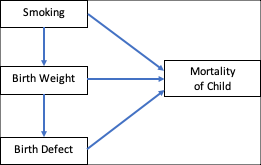

## Paradoxes that aren't

One of the most interesting and famous paradoxes or spurious correlations was discovered by Pearson (inventor of the correlation coefficient) in 1899. It arises when two heterogeneous populations are aggregated into one. Pearson had obtained measurements of 806 male skulls and 340 female skulls from the Paris Catacombs and computed the correlation between skull length and skull breadth. It was found that when data was split by gender, the correlation in each subset, for female only and for male only, was negligible. But when the two groups were combined, the correlation was 0.197. If females' skull dimensions aren't correlated and men's aren't, how can it be that they are when you just merge the two datasets?

This happened because smaller female skulls were combined with larger male skulls. It was a result of combining two distinct populations inappropriately. In effect you have two clusters (men and women) and if you draw a regression line through the data its direction will be influenced more by where the clusters are relative to each other than by correlations within the clusters.

We'll look at this in more detail in the next module by demystifying another example, Simpson's famous paradox.

**End of Module**

You have reached the end of this module.

If you have any questions, please reach out to your peers using the discussion boards. If you and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to your instructor on the designated discussion board.

When you are comfortable with the content, and have practiced to your satisfaction, you may proceed to any related assignments, and to the next module.

# References

- Pearl, J., Mackenzie, D., (2018). *The Book of Why. The New Science of Cause and Effect*. Basic Books.


- Pearl, J., Glymour, M., Jewell, N. P., (2016). *Causal Inference in Statistics: A Primer.* Wiley.